In [1]:
# All required imports
# Run before using

import pandas as pd
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



In [2]:
# Wczytanie danych
path = "data/LDAP.csv"
dataframe = pd.read_csv(path, low_memory=False)

In [3]:
# Ustawienie wyświetlania wszytskich kolumn i wierszy
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
# Wyświetlenie ilości w klasach
print (sorted(Counter(dataframe[" Label"]).items()))

[('BENIGN', 5124), ('LDAP', 1905191), ('NetBIOS', 202919)]


In [5]:
# Dzielenie dataframe na klasy

benign = dataframe[dataframe[' Label'] == 'BENIGN']
ldap = dataframe[dataframe[' Label'] == 'LDAP']
netbios = dataframe[dataframe[' Label'] == 'NetBIOS']

# Losowanie próbek z każdej klasy
benign_sampled = benign.sample(n=5000, random_state=42)
ldap_sampled = ldap.sample(n=2500, random_state=42)
netbios_sampled = netbios.sample(n=2500, random_state=42)

# Połączenie danych
df_balanced = pd.concat([benign_sampled, ldap_sampled, netbios_sampled])

# Stworzenie nowych X i Y
X = df_balanced.drop(columns=[' Label'])  # Zakładamy, że kolumna 'label' zawiera etykiety
Y = df_balanced[' Label']

# Sprawdzenie zbalansowania danych w X i Y
print(X.shape)
print(Y.shape)

(10000, 87)
(10000,)


In [6]:
# Ponowne wyświetlenie ilości w klasach
print (sorted(Counter(df_balanced[" Label"]).items()))

[('BENIGN', 5000), ('LDAP', 2500), ('NetBIOS', 2500)]


In [7]:
# Usunięcie pierwszej kolumny 'Unnamed'
dataframe = X.drop(dataframe.columns[0], axis=1)

dataframe_cleaned = X.drop(dataframe.columns[0], axis=1)

In [8]:
# # Usunięcie kolumn zawierających dane tekstowe
dataframe_cleaned = X.select_dtypes(exclude=['object', 'string'])
print(dataframe_cleaned.head())

        Unnamed: 0   Source Port   Destination Port   Protocol  \
203374      207362         55882                443          6   
204627       16634         60039                443          6   
203888      139390         62468                 53         17   
204033      156362         62981                 53         17   
204270       53526         58583                 53         17   

         Flow Duration   Total Fwd Packets   Total Backward Packets  \
203374           25654                   1                        2   
204627               3                   2                        0   
203888           45177                   2                        2   
204033           20945                   2                        2   
204270           20792                   2                        2   

        Total Length of Fwd Packets   Total Length of Bwd Packets  \
203374                          0.0                          12.0   
204627                         12.0   

In [9]:
# Usunięcie kolumn zawierających dane tekstowe
dataframe_cleaned = X.select_dtypes(exclude=['object', 'string'])

In [10]:
# Spradzenie, czy dane się zgadzają
print(dataframe_cleaned.head())

        Unnamed: 0   Source Port   Destination Port   Protocol  \
203374      207362         55882                443          6   
204627       16634         60039                443          6   
203888      139390         62468                 53         17   
204033      156362         62981                 53         17   
204270       53526         58583                 53         17   

         Flow Duration   Total Fwd Packets   Total Backward Packets  \
203374           25654                   1                        2   
204627               3                   2                        0   
203888           45177                   2                        2   
204033           20945                   2                        2   
204270           20792                   2                        2   

        Total Length of Fwd Packets   Total Length of Bwd Packets  \
203374                          0.0                          12.0   
204627                         12.0   

In [11]:
# Sprawdzenie obecności wartości inf i -inf w danych
print(np.isinf(dataframe_cleaned).sum())  # Liczba wartości inf w każdej kolumnie

Unnamed: 0                        0
 Source Port                      0
 Destination Port                 0
 Protocol                         0
 Flow Duration                    0
 Total Fwd Packets                0
 Total Backward Packets           0
Total Length of Fwd Packets       0
 Total Length of Bwd Packets      0
 Fwd Packet Length Max            0
 Fwd Packet Length Min            0
 Fwd Packet Length Mean           0
 Fwd Packet Length Std            0
Bwd Packet Length Max             0
 Bwd Packet Length Min            0
 Bwd Packet Length Mean           0
 Bwd Packet Length Std            0
Flow Bytes/s                    231
 Flow Packets/s                 243
 Flow IAT Mean                    0
 Flow IAT Std                     0
 Flow IAT Max                     0
 Flow IAT Min                     0
Fwd IAT Total                     0
 Fwd IAT Mean                     0
 Fwd IAT Std                      0
 Fwd IAT Max                      0
 Fwd IAT Min                

In [12]:
# Zastąpienie wartości inf lub -inf np. średnią danej kolumny
dataframe_cleaned = dataframe_cleaned.replace([np.inf, -np.inf], np.nan)  # Zamiana inf na NaN
dataframe_cleaned = dataframe_cleaned.fillna(dataframe_cleaned.mean())  # Wypełnianie NaN średnią

In [13]:
# Ponowne sprawdzenie obecności wartości inf i -inf w danych
print(np.isinf(dataframe_cleaned).sum())  # Liczba wartości inf w każdej kolumnie

Unnamed: 0                      0
 Source Port                    0
 Destination Port               0
 Protocol                       0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
 Bwd Packet Length Std          0
Flow Bytes/s                    0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std                    0
 Fwd IAT Max                    0
 Fwd IAT Min                    0
Bwd IAT Total                   0
 Bwd IAT Mean 

In [14]:
# Sprawdzenie, czy są brakujące wartości
print(dataframe_cleaned.isna().sum())  # Liczba brakujących wartości w każdej kolumnie

Unnamed: 0                      0
 Source Port                    0
 Destination Port               0
 Protocol                       0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
 Bwd Packet Length Std          0
Flow Bytes/s                    0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std                    0
 Fwd IAT Max                    0
 Fwd IAT Min                    0
Bwd IAT Total                   0
 Bwd IAT Mean 

In [15]:
# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataframe_cleaned)

In [16]:
# Usuwamy cechy, które mają stałą wartość w całym zbiorze
dataframe_cleaned = dataframe_cleaned.loc[:, dataframe_cleaned.nunique() > 1]

In [17]:
selector = SelectKBest(score_func=f_classif, k=15)  # Wybieramy 5 najlepszych cech
X_new = selector.fit_transform(dataframe_cleaned, Y)

In [18]:
# Wyświetlamy wybrane cechy
print("Wybrane cechy:", selector.get_support(indices=True))

Wybrane cechy: [ 1  3  9 10 11 17 18 36 38 39 40 46 49 50 69]


In [19]:
# Wyświetlenie nazw wybranych cech
selected_features = dataframe_cleaned.columns[selector.get_support(indices=True)]
print("Nazwy wybranych cech:", selected_features)


Nazwy wybranych cech: Index([' Source Port', ' Protocol', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Flow Packets/s', 'Fwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' URG Flag Count',
       ' Average Packet Size', ' Avg Fwd Segment Size', ' Inbound'],
      dtype='object')


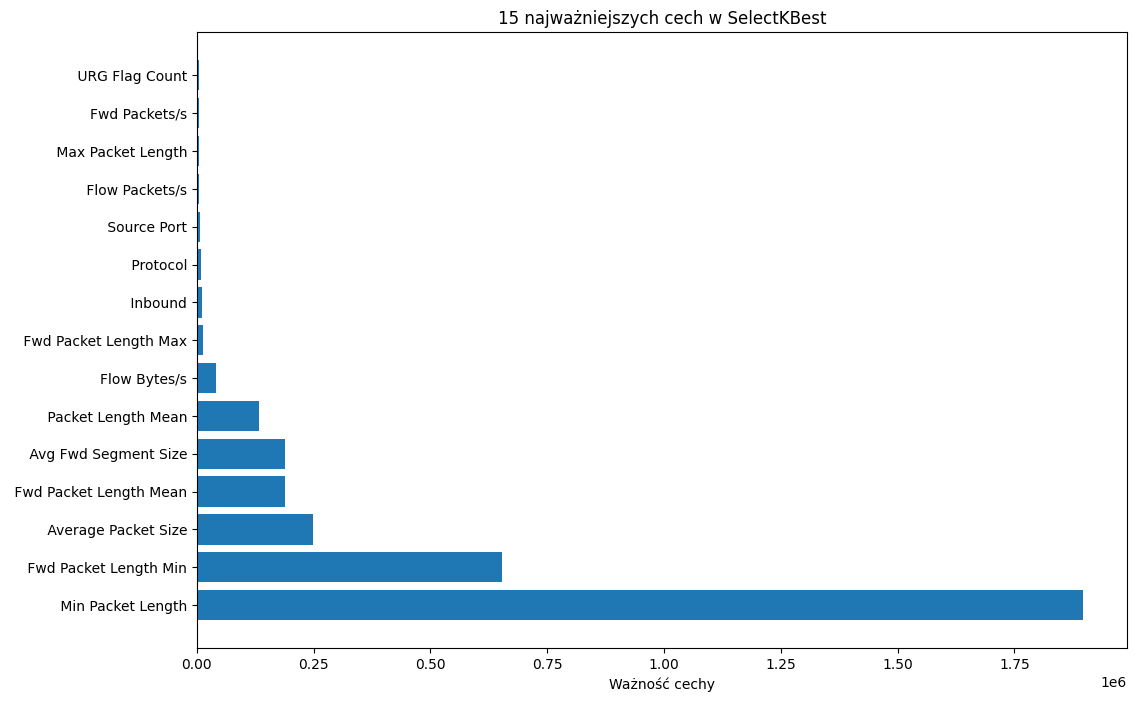

In [20]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Zastosowanie SelectKBest na wszystkich cechach
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' oznacza wszystkie cechy
selector.fit(dataframe_cleaned, Y)

# Uzyskanie wyników (ważności) dla wszystkich cech
importance_scores = selector.scores_

# Tworzenie DataFrame z wynikami
importance_df = pd.DataFrame({'Feature': dataframe_cleaned.columns, 'Importance': importance_scores})

# Sortowanie po ważności (od najwyższej do najniższej)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Wybieramy top 15 cech
top_15_features = importance_df.head(15)

# Tworzenie wykresu słupkowego dla 15 najważniejszych cech
plt.figure(figsize=(12, 8))
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Ważność cechy')
plt.title('15 najważniejszych cech w SelectKBest')
plt.show()


In [27]:
dataframe_cleaned = dataframe_cleaned[selected_features]

In [28]:
# Podział na dane treningowe i testowe
X_train, X_test, Y_train, Y_test = train_test_split(dataframe_cleaned, Y, test_size=0.2, random_state=42)

In [29]:
# Tworzenie modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Trenowanie modelu na danych treningowych
model.fit(X_train, Y_train)

# Zapisanie modelu do pliku
joblib.dump(model, 'undersampling_model_auto_feature_selection.pkl')

# Predykcja na danych testowych
Y_pred = model.predict(X_test)

# Ocena dokładności modelu
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Wyświetlanie raportu klasyfikacji
print(classification_report(Y_test, Y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1012
        LDAP       1.00      1.00      1.00       492
     NetBIOS       1.00      1.00      1.00       496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



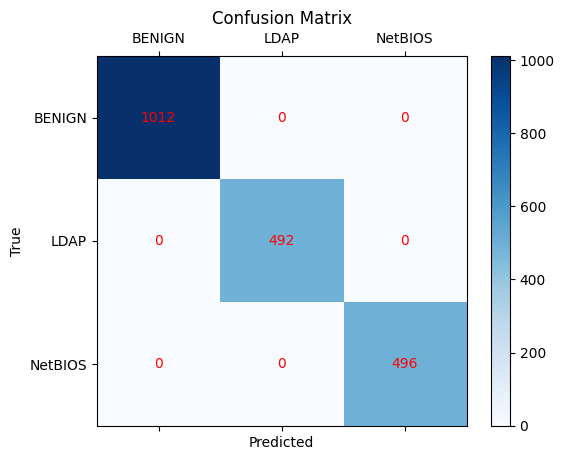

In [30]:
# Obliczenie macierzy pomyłek
cm = confusion_matrix(Y_test, Y_pred)

# Wykres macierzy pomyłek
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)

# Etykiety osi
ax.set_xticks(np.arange(len(model.classes_)))
ax.set_yticks(np.arange(len(model.classes_)))

# Etykiety osi
ax.set_xticklabels(model.classes_)
ax.set_yticklabels(model.classes_)

# Etykiety osi
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Dodanie wartości liczbowych w komórkach
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, val, ha='center', va='center', color='red')

plt.show()

In [31]:
# Wczytanie danych testowych nr 2
path = "data/NetBIOS.csv"

dataframe_test = pd.read_csv(path, low_memory=False)

In [32]:
# wykorzystanie tylko wcześniej wybranych cech
X_2 = dataframe_test[selected_features]
Y_2 = dataframe_test[' Label']

In [33]:
# Sprawdzenie, czy są brakujące wartości
# Liczba brakujących wartości w każdej kolumnie
print(X_2.isna().sum())

# Wypełnianie brakujących wartości średnią
X_2 = X_2.fillna(X_2.mean())

# Sprawdzenie, czy są brakujące wartości
# Liczba brakujących wartości w każdej kolumnie
print(X_2.isna().sum())  

# Sprawdzenie obecności wartości inf i -inf w danych
# Liczba wartości inf w każdej kolumnie
print(np.isinf(X_2).sum())  

# Zastąpienie wartości inf lub -inf np. średnią danej kolumny
# Zamiana inf na NaN
X_2 = X_2.replace([np.inf, -np.inf], np.nan)

# Wypełnianie NaN średnią
X_2 = X_2.fillna(X_2.mean())

# Sprawdzenie obecności wartości inf i -inf w danych
# Liczba wartości inf w każdej kolumnie
print(np.isinf(X_2).sum()) 

# Standaryzacja cech
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)

# Normalizacja cech do zakresu [0, 1]
scaler = MinMaxScaler()
X_2_normalized = scaler.fit_transform(X_2)

 Source Port               0
 Protocol                  0
 Fwd Packet Length Max     0
 Fwd Packet Length Min     0
 Fwd Packet Length Mean    0
Flow Bytes/s               6
 Flow Packets/s            0
Fwd Packets/s              0
 Min Packet Length         0
 Max Packet Length         0
 Packet Length Mean        0
 URG Flag Count            0
 Average Packet Size       0
 Avg Fwd Segment Size      0
 Inbound                   0
dtype: int64
 Source Port               0
 Protocol                  0
 Fwd Packet Length Max     0
 Fwd Packet Length Min     0
 Fwd Packet Length Mean    0
Flow Bytes/s               0
 Flow Packets/s            0
Fwd Packets/s              0
 Min Packet Length         0
 Max Packet Length         0
 Packet Length Mean        0
 URG Flag Count            0
 Average Packet Size       0
 Avg Fwd Segment Size      0
 Inbound                   0
dtype: int64
 Source Port                    0
 Protocol                       0
 Fwd Packet Length Max          0
 F

In [34]:
# Zastąpienie wartości inf lub -inf np. średnią danej kolumny
X_2 = X_2.replace([np.inf, -np.inf], np.nan)  # Zamiana inf na NaN
X_2 = X_2.fillna(X_2.mean())  # Wypełnianie NaN średnią

In [35]:
# Ponowne sprawdzenie obecności wartości inf i -inf w danych
print(np.isinf(dataframe_cleaned).sum())  # Liczba wartości inf w każdej kolumnie

 Source Port               0
 Protocol                  0
 Fwd Packet Length Max     0
 Fwd Packet Length Min     0
 Fwd Packet Length Mean    0
Flow Bytes/s               0
 Flow Packets/s            0
Fwd Packets/s              0
 Min Packet Length         0
 Max Packet Length         0
 Packet Length Mean        0
 URG Flag Count            0
 Average Packet Size       0
 Avg Fwd Segment Size      0
 Inbound                   0
dtype: int64


In [36]:
# Sprawdzenie, czy są brakujące wartości
print(dataframe_cleaned.isna().sum())  # Liczba brakujących wartości w każdej kolumnie

 Source Port               0
 Protocol                  0
 Fwd Packet Length Max     0
 Fwd Packet Length Min     0
 Fwd Packet Length Mean    0
Flow Bytes/s               0
 Flow Packets/s            0
Fwd Packets/s              0
 Min Packet Length         0
 Max Packet Length         0
 Packet Length Mean        0
 URG Flag Count            0
 Average Packet Size       0
 Avg Fwd Segment Size      0
 Inbound                   0
dtype: int64


In [38]:
# Predykcja na nowych danych testowych
Y_2_pred = model.predict(X_2)  # Jeśli używasz X_2_scaled

# Ocena dokładności modelu
accuracy = accuracy_score(Y_2, Y_2_pred)
print("Accuracy:", accuracy)

# Raport klasyfikacji
print("\nClassification Report:")
# print(classification_report(Y_2, Y_2_pred))

# Raport klasyfikacji z parametrem zero_division
print(classification_report(Y_2, Y_2_pred, zero_division=1))

Accuracy: 0.9996958823160051

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.58      1.00      0.73      1321
        LDAP       0.00      1.00      0.00         0
     NetBIOS       1.00      1.00      1.00   3454578

    accuracy                           1.00   3455899
   macro avg       0.53      1.00      0.58   3455899
weighted avg       1.00      1.00      1.00   3455899



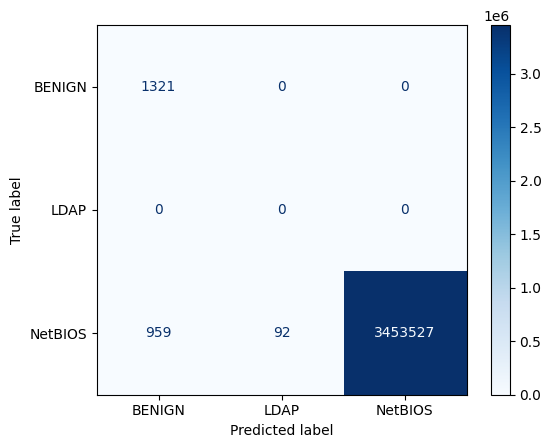

In [40]:
# Obliczenie macierzy pomyłek
cm = confusion_matrix(Y_2, Y_2_pred)

# Wizualizacja macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Formatowanie wartości w macierzy pomyłek jako liczby całkowite
disp.plot(cmap='Blues', values_format='d')

# Wyświetlenie wykresu
plt.show()
